# Algorithm to solve the system of equations

The equations to solve are

\begin{align*}
h(a) &= \int_{a_{c}}^{a} ds \frac{dt(s)}{da} \ I(T(s))(1-h(s))V(s,a) \\
\dfrac{d\epsilon}{da} &= -\dfrac{3 w(a)}{a},
\end{align*}

where 

\begin{align*}
\epsilon(a) &= h(a)\epsilon_{h}(T(a)) + (1-h(a))\epsilon_{q}(T(a)) \\
w(a) &= h(a)w_{h}(T(a)) + (1-h(a))w_{q}(T(a)) \\
\dfrac{dt}{da} &= \dfrac{1}{a} \sqrt{\dfrac{3}{8\pi G \epsilon(a)}}.
\end{align*}

Then

\begin{align*}
\dfrac{d\epsilon}{da} &= \dfrac{dh}{da}\epsilon_{h}(T(a)) + h(a)\dfrac{d\epsilon_{h}}{dT}\dfrac{dT}{da} - \dfrac{dh}{da}\epsilon_{q}(T(a)) + (1 - h(a))\dfrac{d\epsilon_{q}}{dT}\dfrac{dT}{da} \\
&= -\dfrac{3 w(a)}{a},
\end{align*}

which gives us

$$ \dfrac{dT}{da} = - \dfrac{\dfrac{3w(a)}{a} + \dfrac{dh}{da}\left[ \epsilon_{h}(T(a)) + \epsilon_{q}(T(a)) \right]}{h(a)\dfrac{d\epsilon_{h}}{dT} + (1 - h(a))\dfrac{d\epsilon_{q}}{dT}}. $$

Finally, the equations we have to solve are

\begin{align*}
h(a) &= \int_{a_{c}}^{a} ds \frac{dt(s)}{da} \ I(T(s))(1-h(s))V(s,a) \\
\dfrac{dT}{da} &= - \dfrac{\dfrac{3w(a)}{a} + \dfrac{dh}{da}\left[ \epsilon_{h}(T(a)) + \epsilon_{q}(T(a)) \right]}{h(a)\dfrac{d\epsilon_{h}}{dT} + (1 - h(a))\dfrac{d\epsilon_{q}}{dT}}.
\end{align*}

These equations must be solved numerically, in each step we will use the previous steps to build the solutions.

We can approximate the integral with a simple trapezoidal rule. Let us denote $h_{i} = h(a_{i})$, $T_{i} = T(a_{i})$ where $\{ a_{i} \}$ is some partition of the integration interval. Then

\begin{align*}
h(a_{k}) &= \int_{a_{c}}^{a} ds \frac{dt(s)}{da} \ I(T(s))(1-h(s))V(s,a)  \\
&\approx \sum_{i=1}^{k-1} \frac{dt(a_{i-1})}{da}\dfrac{I(T_{i-1})(1-h_{i-1})V(a_{i-1},a_{k-1}) + \frac{dt(a_{i})}{da}I(T_{i})(1-h_{i})V(a_{i},a_{k-1})}{2} \Delta a.
\end{align*}

However, there is a problem because the function $V(a',a)$ contains an integral  

$$ V(a', a) = \dfrac{4\pi}{3} \left( r_{*}(T(a')) + 3\int_{a'}^{a}ds \dfrac{dt(s)}{da}  \ \left( 1-\dfrac{T(s)}{T_{c}} \right)^{3/2} \right)^{3}, $$ 

we could evaluate each time the integral with a trapezoidal rule, however, we can save a lot of work by noticing the following

\begin{align*}
\int_{a_{i+1}}^{a_{k}}ds \dfrac{dt(s)}{da}  \ \left( 1-\dfrac{T(s)}{T_{c}} \right)^{3/2} = \int_{a_{i}}^{a_{k}}ds \dfrac{dt(s)}{da}  \ \left( 1-\dfrac{T(s)}{T_{c}} \right)^{3/2} - \int_{a_{i}}^{a_{i+1}}ds \dfrac{dt(s)}{da}  \ \left( 1-\dfrac{T(s)}{T_{c}} \right)^{3/2},
\end{align*}

with this we don't have to calculate the integral in  $V(a', a)$ each time, but instead we take advantage of the work we have already done. This little trick is really important, because if we calculate the integral in $V(a', a)$ each time the running time of the algorithm will be $\mathcal{O}(N^{3})$ (which is a lot), but if we use this little trick we can reduce the running time of the algorithm to $\mathcal{O}(N^{2})$. These approximations are in terms of the previous steps, so we have an explicit method to numerically solve the integral equation. For the differential equation we can use Euler method

$$ T_{i+i} = T_{i} + \Delta a \dfrac{dT(a_{i})}{da}, $$

notice that in the function $\dfrac{dT(a_{i})}{da}$ we need to calculate $\dfrac{dh(a_{i})}{da}$, which we can approximate by 

$$ \dfrac{dh(a_{i})}{da} \approx \dfrac{h_{i} - h_{i-1}}{\Delta a}. $$

Therefore, the algorithm to solve the system of integro differential equation is:

$\textbf{Integro-differential}$($\Delta a$, $a_{final}$)

$\textbf{Result:}$ Two arrays with the numerical solutions for $h(a)$ and $T(a)$

   1. Set $T = [T_{c}]$ and $h = [0]$, which are arrays with the initial conditions.
   2. Set $a = a_{c} = 1$ and $i = 1$.
   3. $\textbf{while}$ $a \leq a_{final}$
   4. $\qquad$ $\textbf{if}$ $i = 1$
   5. $\qquad \qquad$ $\frac{dh}{da} = 0$
   6. $\qquad$ $\textbf{else}$
   7. $\qquad \qquad$ $\frac{dh}{da} = \frac{h_{i} - h_{i-1}}{\Delta a_{i}}$
   8. $\qquad$ $T_{i} = T_{i-1} + \Delta a\frac{dT(a_{i-1})}{da}$
   9. $\qquad$ $h_{i} = \displaystyle\sum_{j=1}^{i-1} \dfrac{\frac{dt(a_{j-1})}{da}I(T_{j-1})(1-h_{j-1})V(a_{j-1},a_{i-1}) + \frac{dt(a_{j})}{da}I(T_{j})(1-h_{j})V(a_{j},a_{i-1})}{2} \Delta a$
   10. $\qquad$ $a_{i} = a_{i-1} + \Delta a$
   11. $\qquad$ $\textbf{if}$ $h > 1$
   12. $\qquad$ $\qquad$ $\textbf{break}$
   13. $\qquad$ Append $ T_{i} $ to array $T$ and $h_{i}$ to array $h$
   14. $\qquad$ $i = i+1$
   
We can also make the step $\Delta a$ variable in the parts where we don't need so much precision in order to reduce the running time.

The error in the integrals with the trapezoidal rule is $\mathcal{O}(\Delta a^2)$ and the error in the Euler method is $\mathcal{O}(\Delta a)$, therefore the total error in the method is $\mathcal{O}(\Delta a)$. Even if we use a more complicated method to calculate the integral we don´t reduce the error because of the error in  Euler method, 

# Code

The next packages are needed, so download them beforehand. Sometimes there is an error giving complex numbers, if you get that error make the step $\Delta a$ smaller. 

In [1]:
using Plots, DelimitedFiles, NumericalIntegration, LaTeXStrings
gr(fmt = "png")

Plots.GRBackend()

In [2]:
# Constants

T_c = 160 # Mev
a_c = 1

g_q = 47.5 + 14.25       
g_h = 3 + 14.25         

σ = 50*(197^2) # MeV

ξ_q = 0.7/197 # Mev

G = (6.70*(10^-45)) # MeV^(-2)

# Bag constant
B = g_q*(π^2/90)*(1 - g_h/g_q)*(T_c^4);

In [3]:
# Pressures

Pq(T) = g_q*(π^2/90)*T^4 - B
Ph(T) = g_h*(π^2/90)*T^4

P(h, T) = h*Ph(T) + (1-h)*Pq(T)

ΔP(T) = Ph(T) - Pq(T)

# Energies

ϵ_q(T) = g_q*(π^2/30)*T^4 + B
ϵ_h(T) = g_h*(π^2/30)*T^4  

ϵ(h, T) = h*ϵ_h(T) + (1-h)*ϵ_q(T)

dϵq_dT(T) = 4*g_q*(π^2/30)*T^3
dϵh_dT(T) = 4*g_h*(π^2/30)*T^3

# Enthalpies

w_q(T) = g_q*(π^2/90)*T^4 +  g_q*(π^2/30)*T^4
w_h(T) = g_h*(π^2/90)*T^4 +  g_h*(π^2/30)*T^4

w(h, T) = h*w_h(T) + (1-h)*w_q(T)

Δw(T) = w_h(T) - w_q(T)

# Bubble-growth velocity

v(T) = 3*(1-T/T_c)^(3/2)

# Viscosities

η_q(T) = 18*T^3

ζ_q = 0

# Critical-radius

r₀(T) = (2*σ)/(Ph(T) - Pq(T)) 

# Free-energy difference (at the critical radius)

ΔF₀(T) = (4/3)*π*σ*(r₀(T))^2

# Nucleation rate

I(T) = (4/π)*((σ/(3*T))^(3/2))*((σ*r₀(T)*(3*ζ_q + 4*η_q(T)))/(3*ξ_q^4*(Δw(T))^2))*exp(-ΔF₀(T)/T)

# Change of variables from t to a

dt_da(a, h, T) = (1/a)*((3/(8*π*G*((h*ϵ_h(T))+((1-h)*ϵ_q(T)))))^(1/2));

function n_density(as, hs, Ts, Is, factor)
    
    """
    Average bubble density.
    """
    
    ns = []
    
    n = length(as)
         
    integral = 0
    
    for i in 1:n
        i == 1 ? Δa = as[2]-as[1] : Δa = as[i]-as[i-1]
        f_n(i) = Δa*dt_da(as[i], hs[i], Ts[i])*Is[i]*(1-hs[i])
        i == 1 ? integral = integral + factor*f_n(i) : integral = integral + factor*(f_n(i) + f_n(i-1))/2 
        push!(ns, integral)
    end
     
    return ns
end

n_density (generic function with 1 method)

In [4]:
function V(i::Number, k::Number, integral_Vs::Array, as::Array, hs::Array, Ts::Array)  
    
    """
    This function calculates the volume V(a',a) with the "trick" that reduces the complety to O(N²).
    """
    
    # Only in the first step of each iteration we calculate the integral with the trapezoidal rule.
    if i == 1
                
        integral_V = Float64[3*((1-Ts[j]/T_c)^(3/2))*dt_da(as[j], hs[j], Ts[j]) for j in 1:(k-1)]
        as′ = Float64[as[j] for j in 1:(k-1)]
        
        integral_volumen = integrate(as′, integral_V, Trapezoidal())
                        
        volume = 4/3*π*(r₀(Ts[i]) + integral_volumen)^3
        push!(integral_Vs, integral_volumen)
        
        return volume
    
    # In the next iterations we use the "trick" that uses what we have already done.
    else
        Δa′ = as[i]-as[i-1] # In case a variable step is used
        f_aux(i, as, hs, Ts) = ((1-Ts[i]/T_c)^(3/2))*dt_da(as[i], hs[i], Ts[i])
        
        integral_volumen = integral_Vs[i-1] - 3*Δa′*((f_aux(i-1, as, hs, Ts) + f_aux(i, as, hs, Ts))/2)
        
        volume = 4/3*π*(r₀(Ts[i]) + integral_volumen)^3 
        push!(integral_Vs, integral_volumen)
        
        return volume
        
    end
    
end

V (generic function with 1 method)

In [5]:
function integral_h(k::Number, as::Array, hs::Array, Ts::Array)
    
    """
    This function is to calculate the integral equation for h.
    """
    
    integral_Vs = []
   
    integrales = Float64[I(Ts[i])*(1-hs[i])*V(i, k, integral_Vs, as, hs, Ts)*dt_da(as[i], hs[i], Ts[i]) for i in 1:(k-1)]
    
    as′ = Float64[as[i] for i in 1:(k-1)]
    
    # There is a small numerical error at the beginning of the routine, which gives very small negative numbers, that's
    # why need the abs() function.
    
    return abs(integrate(as′, integrales, Trapezoidal()))
    
end

integral_h (generic function with 1 method)

In [6]:
function integro_differential(a_f::Number, Δa::Number)
    
    """
    Implementation of our algorithm.
    """
    
    as = []
    hs = []
    Ts = []
    
    a = a_c
    h = 0.0
    T = T_c
    
    push!(as, a) 
    push!(hs, h)
    push!(Ts, T)   
    
    # First step (would be i=1 if arrays started at 0, but in Julia they start at 1)
    i = 2 
    
    # These variables are used only if a variable step is needed
    Δa_aux = Δa
    n = 2
       
    fT(a, h, T, dh_da) = -(3*w(h,T)/a + dh_da*( ϵ_h(T) - ϵ_q(T) ))/( h*dϵh_dT(T) + (1-h)*dϵq_dT(T) )
    
    while a <= a_f
        
        # If you need a variable step try changing these lines according to your needs
        if (i >= 20000) && (i%1000 == 0) && (n <= 10)
            Δa = n*Δa_aux
            n = n + 1
        end 
        
        i == 2 ? dh_da = 0 : dh_da = (hs[i-1]-hs[i-2])/Δa
                                  
        if h > 1
           println("a_final =$(a)")
           break
        end
        
        T = T + Δa*fT(a, h, T, dh_da)
        a = a + Δa
        h = integral_h(i, as, hs, Ts)

        push!(as, a)
        push!(hs, h)
        push!(Ts, T)
        
        i = i+1
        
        # It is a good idea to save the solutions from time to time to see the behaviour of the solutions in other
        # program or in the case something goes wrong
        if i % 5000 == 0
            writedlm("results.txt", [as hs Ts])
        end
                       
    end
    
    writedlm("results.txt", [as hs Ts])
        
    return as, hs, Ts    
    
end  

integro_differential (generic function with 1 method)

In [9]:
a_f = 1.8
Δa = 0.00001

@time results = integro_differential(a_f, Δa)

as, hs, Ts = results;

a_final =1.529830000003471
5291.574349 seconds (232.90 G allocations: 3.460 TiB, 17.06% gc time)


# Results

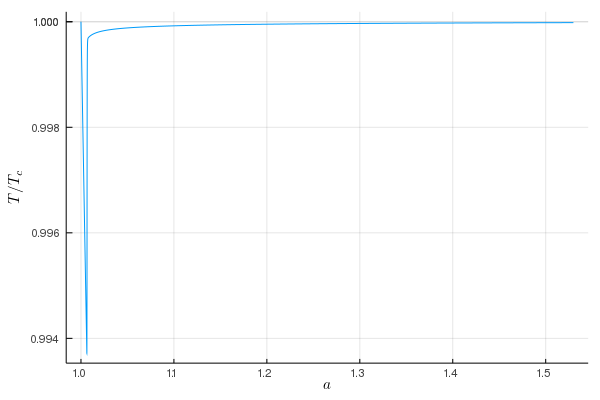

In [10]:
plot(as, Ts/T_c, label = "", xlabel = L"a", ylabel = L"T/T_{c}")  

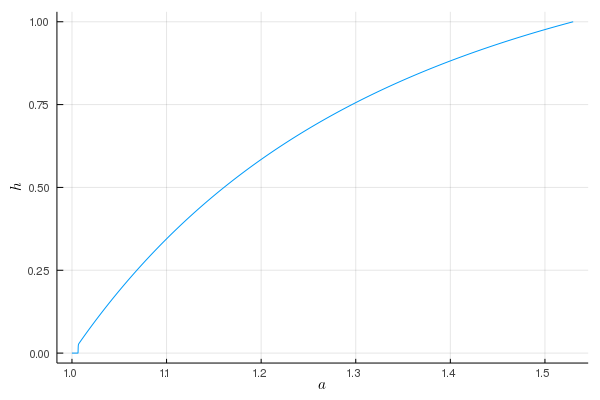

In [11]:
plot(as, hs, label = "", xlabel = L"a", ylabel = L"h")

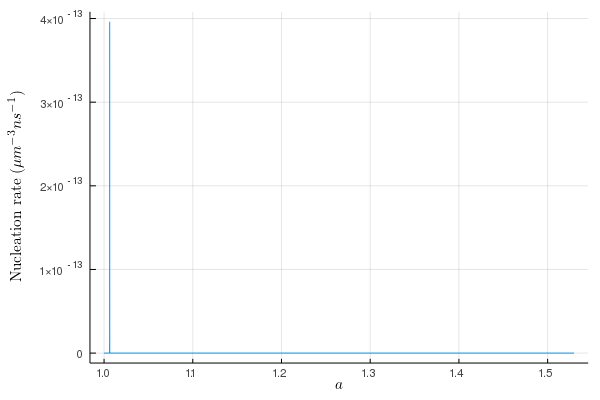

In [12]:
factor = (1.96*10.0^32) # factor to get the right units

Is = [factor*I(Ts[i]) for i in 1:length(as)] 

plot(as, Is, label = "", xlabel = L"a", ylabel = L"\textnormal{Nucleation rate } (\mu m^{-3}ns^{-1})")

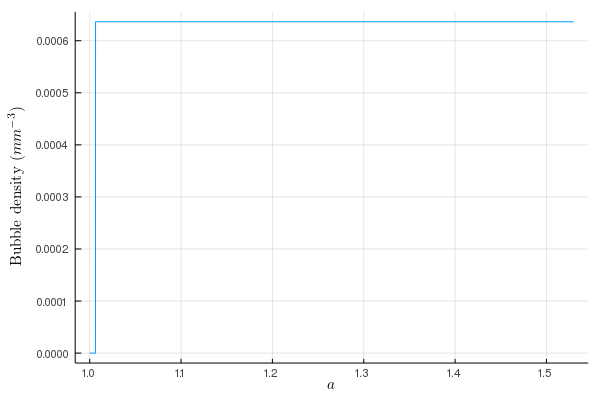

In [13]:
factor = (1.31*10.0^29) # factor to get the right units

Is′ = [I(Ts[i]) for i in 1:length(as)]

ns = n_density(as, hs, Ts, Is′, factor)

plot(as, ns, label = "", xlabel = L"a", ylabel = L"\textnormal{Bubble density } (mm^{-3})")

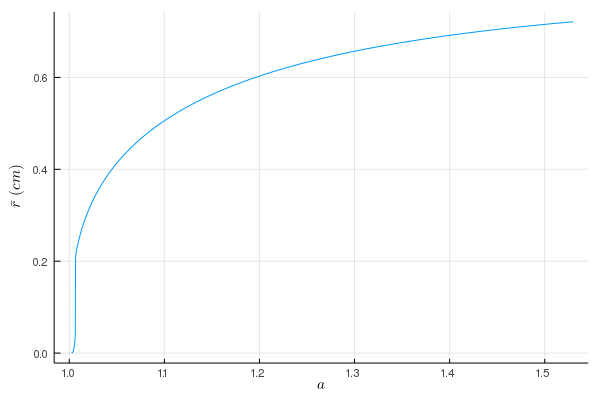

In [14]:
factor = 0.1 # factor to get the right units

rs = [factor*((hs[i]/(ns[i]))*(3/(4*π)))^(1/3) for i in 1:length(as)]

plot(as, rs, label = "", xlabel = L"a", ylabel = L"\bar{r} \ (cm)")

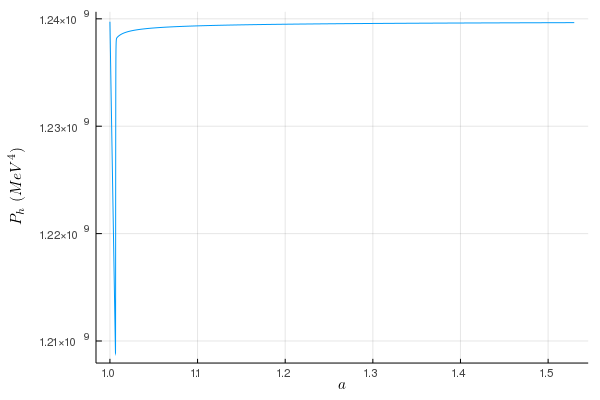

In [15]:
Phs = [Ph(T) for T in Ts]
plot(as, Phs, label = "", xlabel = L"a", ylabel = L"P_{h} \ (MeV^4)")

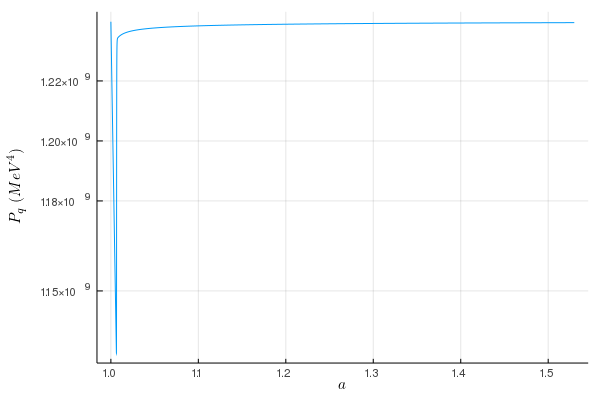

In [16]:
Pqs = [Pq(T) for T in Ts]
plot(as, Pqs, label = "", xlabel = L"a", ylabel = L"P_{q} \ (MeV^4)")

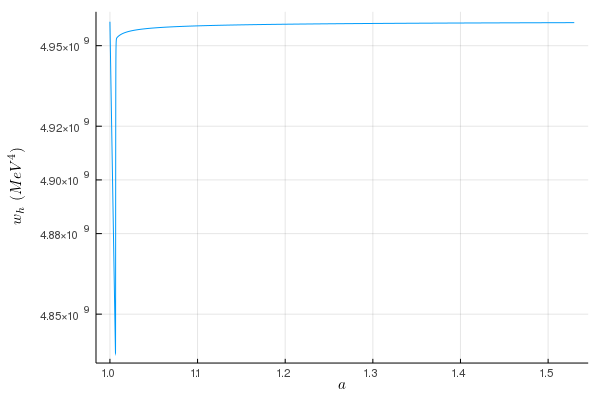

In [17]:
whs = [w_h(T) for T in Ts]
plot(as, whs, label = "", xlabel = L"a", ylabel = L"w_{h} \ (MeV^4)")

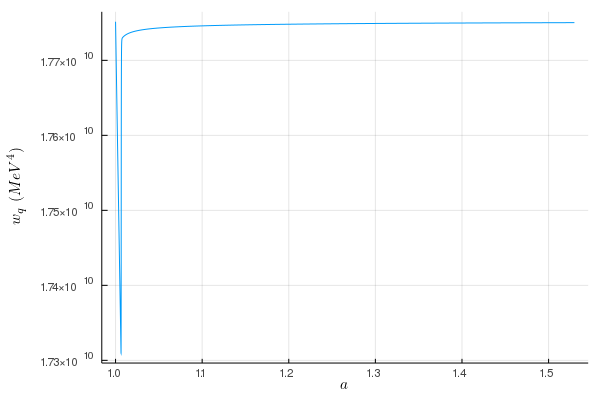

In [18]:
wqs = [w_q(T) for T in Ts]
plot(as, wqs, label = "", xlabel = L"a", ylabel = L"w_{q} \ (MeV^4)")

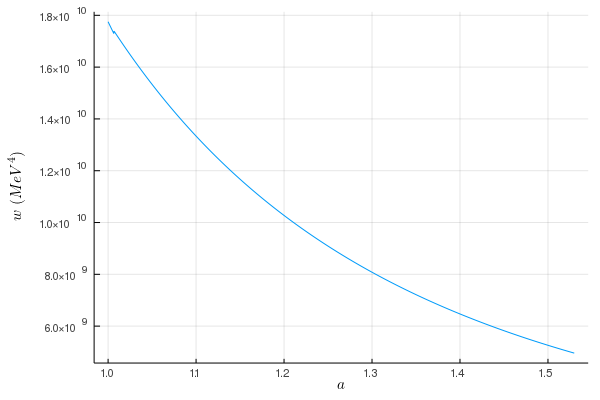

In [19]:
ws = [w(hs[i], Ts[i]) for i in 1:length(Ts)]
plot(as, ws, label = "", xlabel = L"a", ylabel = L"w \ (MeV^4)")

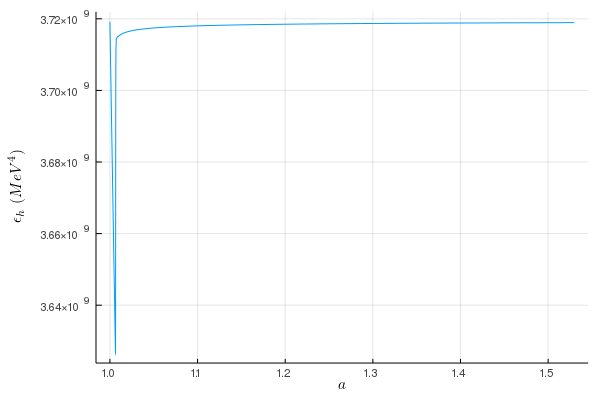

In [20]:
ϵhs = [ϵ_h(T) for T in Ts]
plot(as, ϵhs, label = "", xlabel = L"a", ylabel = L"\epsilon_{h} \ (MeV^4)")

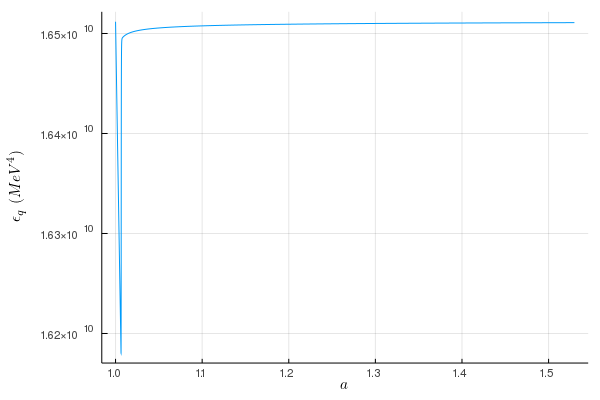

In [21]:
ϵqs = [ϵ_q(T) for T in Ts]
plot(as, ϵqs, label = "", xlabel = L"a", ylabel = L"\epsilon_{q} \ (MeV^4)")

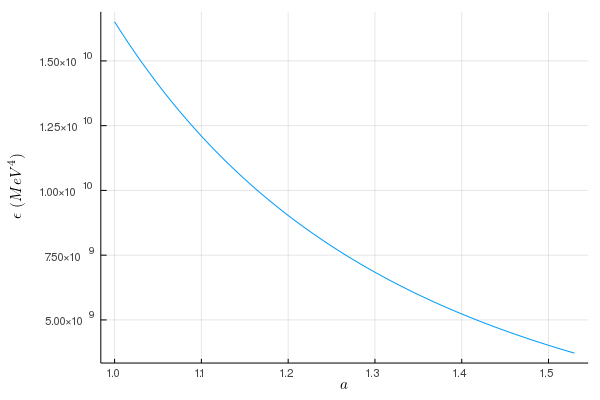

In [22]:
ϵs = [ϵ(hs[i], Ts[i]) for i in 1:length(Ts)]
plot(as, ϵs, label = "", xlabel = L"a", ylabel = L"\epsilon \ (MeV^4)")

In [24]:
# If you want to save all the results in csv file run this line
writedlm("results.csv", [vcat("a", as) vcat("h", hs) vcat("T", Ts) vcat("I", Is) vcat("n", ns) vcat("r", rs) vcat("Ph", Phs) vcat("Pq", Pqs) vcat("wh", whs) vcat("wq", wqs) vcat("w", ws) vcat("eh", ϵhs) vcat("eq", ϵqs) vcat("e", ϵs)])

### Convergence tests

These tests tell us if our method is right and how small we need to do the step $\Delta a$ in order to get good results. In the figures below we can see that the solutions actually converge as we make $\Delta a$ smaller. The solutions appear to converge with $\Delta a = 0.000001$, if we make the step smaller we don't get more precision.

In [227]:
N = 20

a_convergence = []
h_convergence = []
T_convergence = []

for i in 1:N
    a_f = 1.01
    Δa = 0.00001*(1/i)

    @time results = integro_differential(a_f, Δa)

    as, hs, Ts = results;
    
    push!(a_convergence, as)
    push!(h_convergence, hs)
    push!(T_convergence, Ts)
    
end

  1.705509 seconds (81.58 M allocations: 1.242 GiB, 10.32% gc time)
  6.667587 seconds (328.65 M allocations: 4.999 GiB, 9.74% gc time)
 14.815879 seconds (741.72 M allocations: 11.289 GiB, 10.11% gc time)
 26.103583 seconds (1.32 G allocations: 20.094 GiB, 10.14% gc time)
 41.011113 seconds (2.07 G allocations: 31.438 GiB, 10.26% gc time)
 58.804038 seconds (2.98 G allocations: 45.301 GiB, 10.41% gc time)
 80.279158 seconds (4.06 G allocations: 61.685 GiB, 10.45% gc time)
105.612158 seconds (5.30 G allocations: 80.557 GiB, 10.54% gc time)
134.344574 seconds (6.71 G allocations: 102.009 GiB, 10.56% gc time)
168.075800 seconds (8.28 G allocations: 126.034 GiB, 10.58% gc time)
204.462379 seconds (10.02 G allocations: 152.538 GiB, 10.68% gc time)
245.704141 seconds (11.93 G allocations: 181.546 GiB, 10.74% gc time)
288.105491 seconds (14.00 G allocations: 213.024 GiB, 10.85% gc time)
336.351909 seconds (16.24 G allocations: 247.036 GiB, 10.91% gc time)
386.253265 seconds (18.65 G allocati

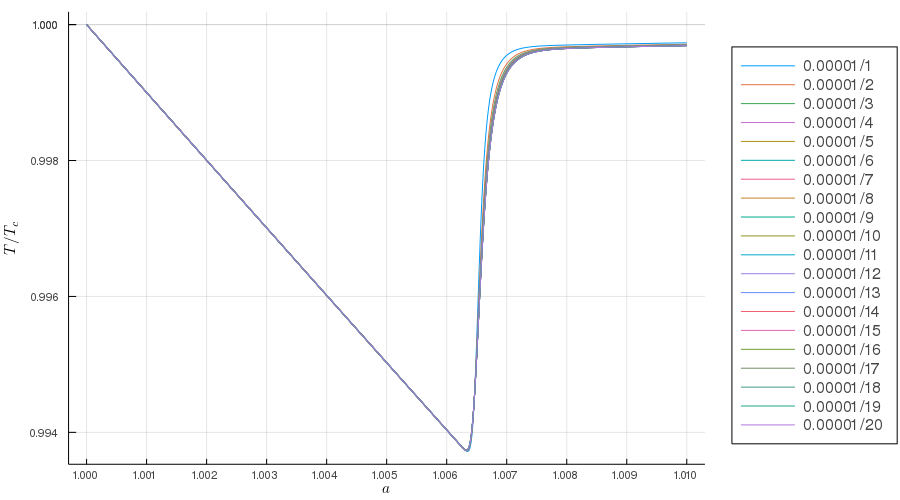

In [266]:
grafica = plot(xlabel=L"a", ylabel= L"T/T_{c}", size = (900, 500), xticks = 1.0:0.001:1.01)

for i in 1:N
    Δa = 0.00001*(1/i)
    grafica = plot!(a_convergence[i], T_convergence[i]/T_c, label = "0.00001/$(i)", legend=:outertopright, legendfontsize=10)
end

grafica

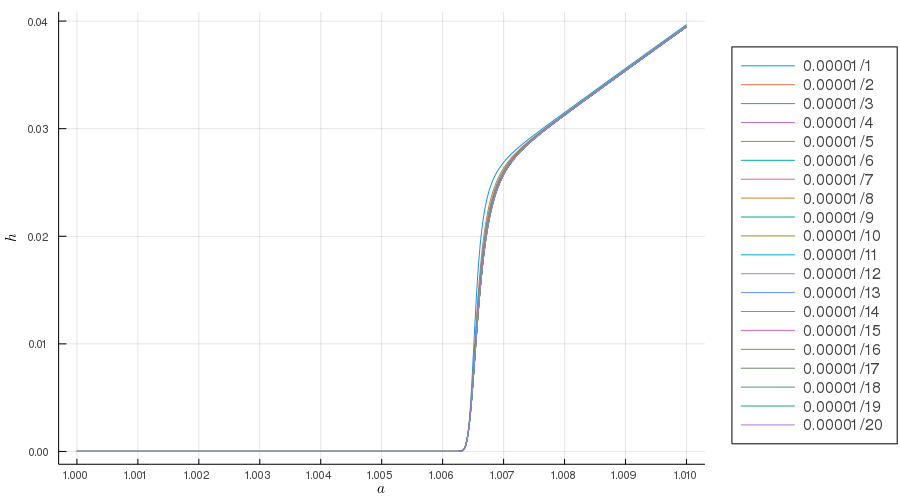

In [248]:
grafica = plot(xlabel = L"a", ylabel = L"h", size = (900, 500), xticks = 1.0:0.001:1.01)

for i in 1:N
    Δa = 0.00001*(1/i)
    grafica = plot!(a_convergence[i], h_convergence[i], label = "0.00001/$(i)", legend=:outertopright, legendfontsize=10)
end

grafica

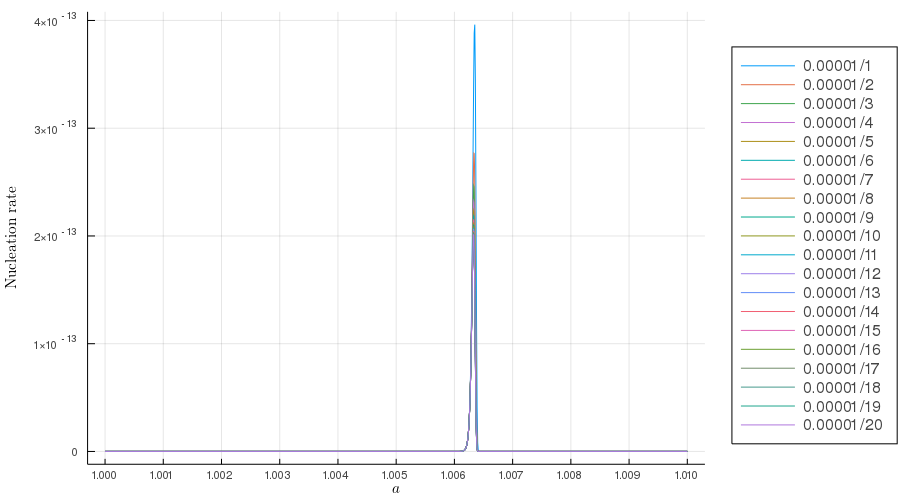

In [251]:
grafica = plot(xlabel = L"a", ylabel = L"\textnormal{Nucleation rate}", size = (900, 500), xticks = 1.0:0.001:1.01)

factor = (1.96*10.0^32)

for i in 1:N
    Is = [I(T)*factor for T in T_convergence[i]] # ¿unidades?
    Δa = 0.00001*(1/i)
    grafica = plot!(a_convergence[i], Is, label = "0.00001/$(i)", legend=:outertopright, legendfontsize=10)
end

grafica

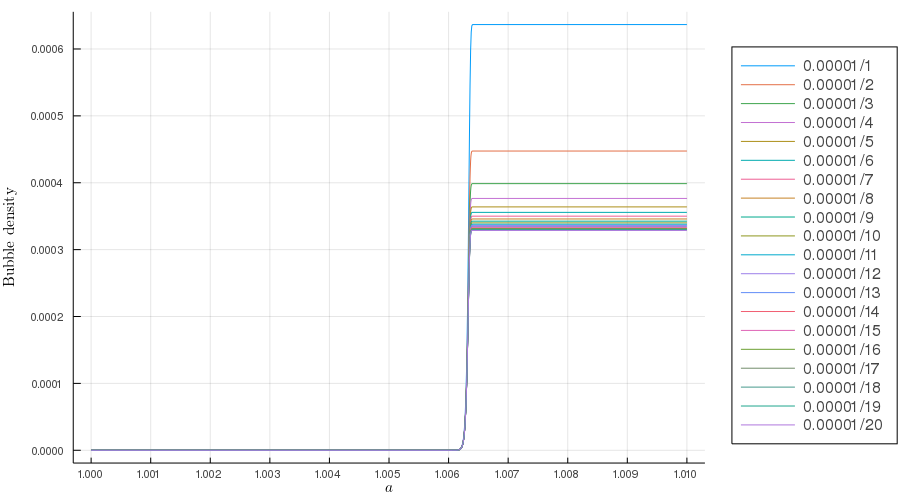

In [290]:
grafica = plot(xlabel = L"a", ylabel=L"\textnormal{Bubble density}", size = (900, 500), xticks = 1.0:0.001:1.01)

factor1 = (1.96*10.0^32)
factor2 = (1.31*10.0^29)

for i in 1:N
    Δa = 0.00001*(1/i)
    
    Is = [I(T) for T in T_convergence[i]]
    ns = N_density(a_convergence[i], h_convergence[i], T_convergence[i], Is, factor2)
    grafica = plot!(a_convergence[i], ns, label = "0.00001/$(i)", legend=:outertopright, legendfontsize=10)
end

grafica

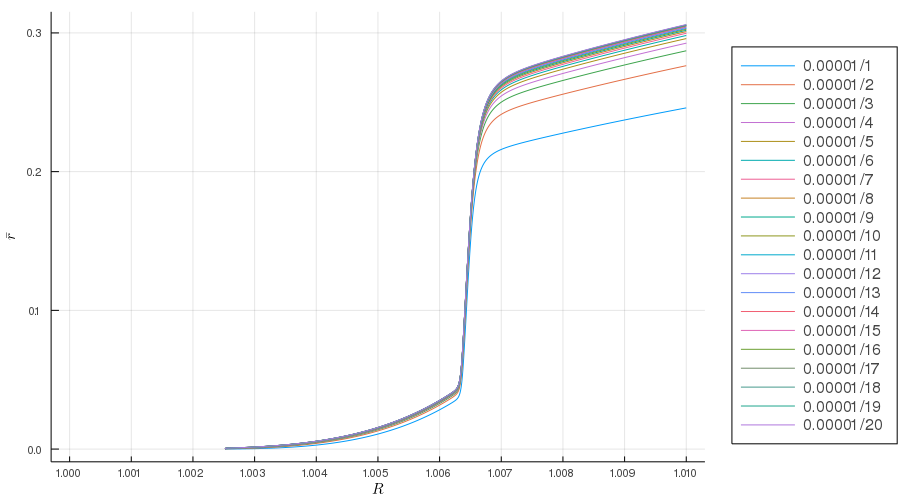

In [270]:
grafica = plot(xlabel = L"a", ylabel = L"\bar{r}", size = (900, 500), xticks = 1.0:0.001:1.01)

factor1 = (1.96*10.0^32)
factor2 = (1.31*10.0^29)

for i in 1:N
    Δa = 0.00001*(1/i)
    
    Is = [I(T) for T in T_convergence[i]] # ¿unidades?
    factor = 0.1
    
    ns = N_density(a_convergence[i], h_convergence[i], T_convergence[i], Is, factor2)

    rs = [factor*((h_convergence[i][j]/(ns[j]))*(3/(4*π)))^(1/3) for j in 1:length(a_convergence[i])]

    grafica = plot!(a_convergence[i], rs, label = "0.00001/$(i)", legend=:outertopright, legendfontsize=10) 
    
end

grafica